# Projet 7: Linear Regression

## Albert Kabore


## Part 1 - Chart a Straight Line


In [27]:
#Import Dependencies 
#Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Define a variable c


Let c be degrees in Celcisus and it is a function of an input variable f, which stands for degrees in Fahrenheit.



In [28]:
%matplotlib inline
c = lambda f: 5 / 9 * (f - 32)

## Plot the function converting degrees Fahrenheit to degrees Celcisus


In [29]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [30]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

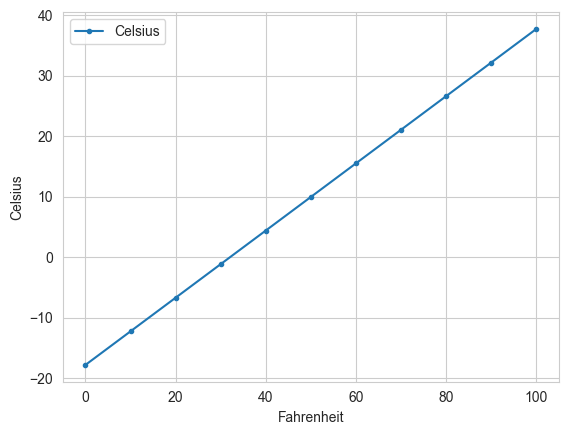

In [31]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part 2: Predict Average High Temperatures in New York City in January


## Section 1 - Data Acquisition


In [32]:
nyc = pd.read_csv('avg_hi_ny.csv')


## Section 2 - Data Inspection


In [33]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [34]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Section 3 - Data Cleaning


In [35]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [36]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [37]:
nyc.Date.dtype

dtype('int64')

In [38]:
nyc.Date = nyc.Date.floordiv(100)

In [39]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Section 4 - Descriptive Statistics


In [40]:
pd.set_option('display.precision', 2)


In [41]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Section 5 - Build the Model


### Forecasting Future January Average High Temperatures

## The slope of the linear regression formula predicting temperature in degrees Fahrenheit in New York City

In [42]:
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

In [43]:
linear_regression.slope

0.014771361132966163

## The  y - coordinate of the y - intercept of the linear regression formula predicting temperature in degrees Fahrenheit in New York City


In [44]:
linear_regression.intercept

8.694993233674289

In [45]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [46]:
linear_regression.slope * 1850 + linear_regression.intercept

36.022011329661694

## Section 6 - Predict


### Plotting the Average High Temperatures and a Regression Line 

In [47]:
sns.set_style('whitegrid')

(10.0, 70.0)

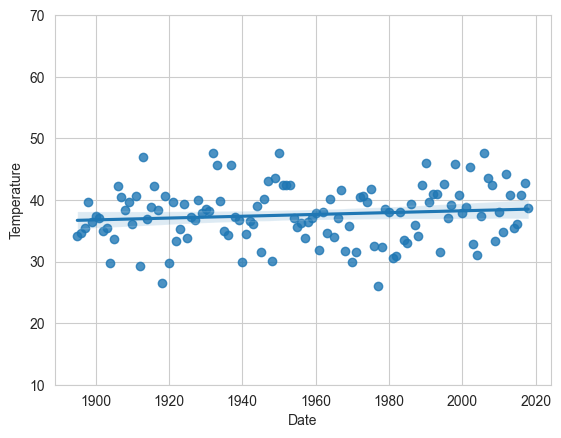

In [48]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

In [49]:
# Extra cell added to keep subsequent snippet numbers the same as the chapter.
# Had to merge the two prior cells for use in the notebook.

In [50]:
### Getting Time Series Datasets

In [51]:
![Self Check Exercises check mark image](files/art/check.png)
# 10.16 Self Check

'[Self' is not recognized as an internal or external command,
operable program or batch file.
